In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

63


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,888083d56432061278fb7360ea65ef62db47e4d3,fiery-rins,bdsaglam/musique,answerable,validation,llama-3-8b-tgi,0.0,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,180,1039,46.677575,22.478570,12,32.00,42.0,58.0,170,CTE
1,49d2c3fe4825f9ae6610fa155731ada72a3114ff,dowie-zila,bdsaglam/musique,answerable,validation,llama-3-8b-tgi,0.5,cok/adapted.txt,cq.txt,manual/cok.json,...,204,993,84.375629,38.912341,0,67.00,85.0,103.0,404,COK
2,953002dfd63b7bfda6f538576e9f6a3adcc46ba5,guest-debt,bdsaglam/musique,answerable,validation,llama-3-8b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,164,1070,53.973832,219.674854,12,32.00,41.0,58.0,7168,CTE
3,602198b54045425394ca008a6e615a8fa3a73b40,malar-froe,bdsaglam/musique,answerable,validation,llama-3-8b-tgi,0.5,cok/adapted.txt,cq.txt,manual/cok.json,...,232,994,98.242455,323.897216,3,65.25,86.0,105.0,7342,COK
4,f1376a086260e39ddc77fe1195436474a9b004ec,ocher-hunk,bdsaglam/musique,answerable,validation,llama-3-8b-tgi,0.0,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,131,1005,58.213930,296.368104,8,31.00,41.0,57.0,7168,CTE


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,rabic-coal,llama-3-8b-tgi,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.499793,...,205,939,94.238552,226.609116,3,72.00,86.0,103.0,6964,COK
1,finer-yobs,llama-3-70b-tgi,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.617294,...,226,650,99.304615,30.971374,24,78.00,95.0,114.0,273,COK
2,other-shad,llama-3-8b-tgi,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.504758,...,212,935,94.157219,227.070539,3,72.00,87.0,103.0,6964,COK
3,gouty-sook,llama-3-70b-tgi,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.616467,...,226,655,98.978626,30.201659,24,78.00,96.0,114.0,298,COK
4,malar-froe,llama-3-8b-tgi,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.486554,...,232,994,98.242455,323.897216,3,65.25,86.0,105.0,7342,COK


In [5]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [6]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [7]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [8]:
target_param_cols

['params.qa.technique',
 'params.qa.system_prompt',
 'params.qa.few_shot_examples',
 'params.qa.n_shot',
 'params.qa.n_sc',
 'params.qa.temperature']

In [9]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
2,COK,cok/adapted,manual/cok,1,1,0.0,0.635085,0.746846,0.661342,0.774246,...,101.0,197,852,94.644737,27.110588,43,76.0,91.0,110.0,224
11,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,0.626396,0.741961,0.654952,0.769527,...,49.0,153,1075,46.085446,21.006068,13,34.0,43.0,57.0,183


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots
    plt.show()

llama-3-8b-tgi


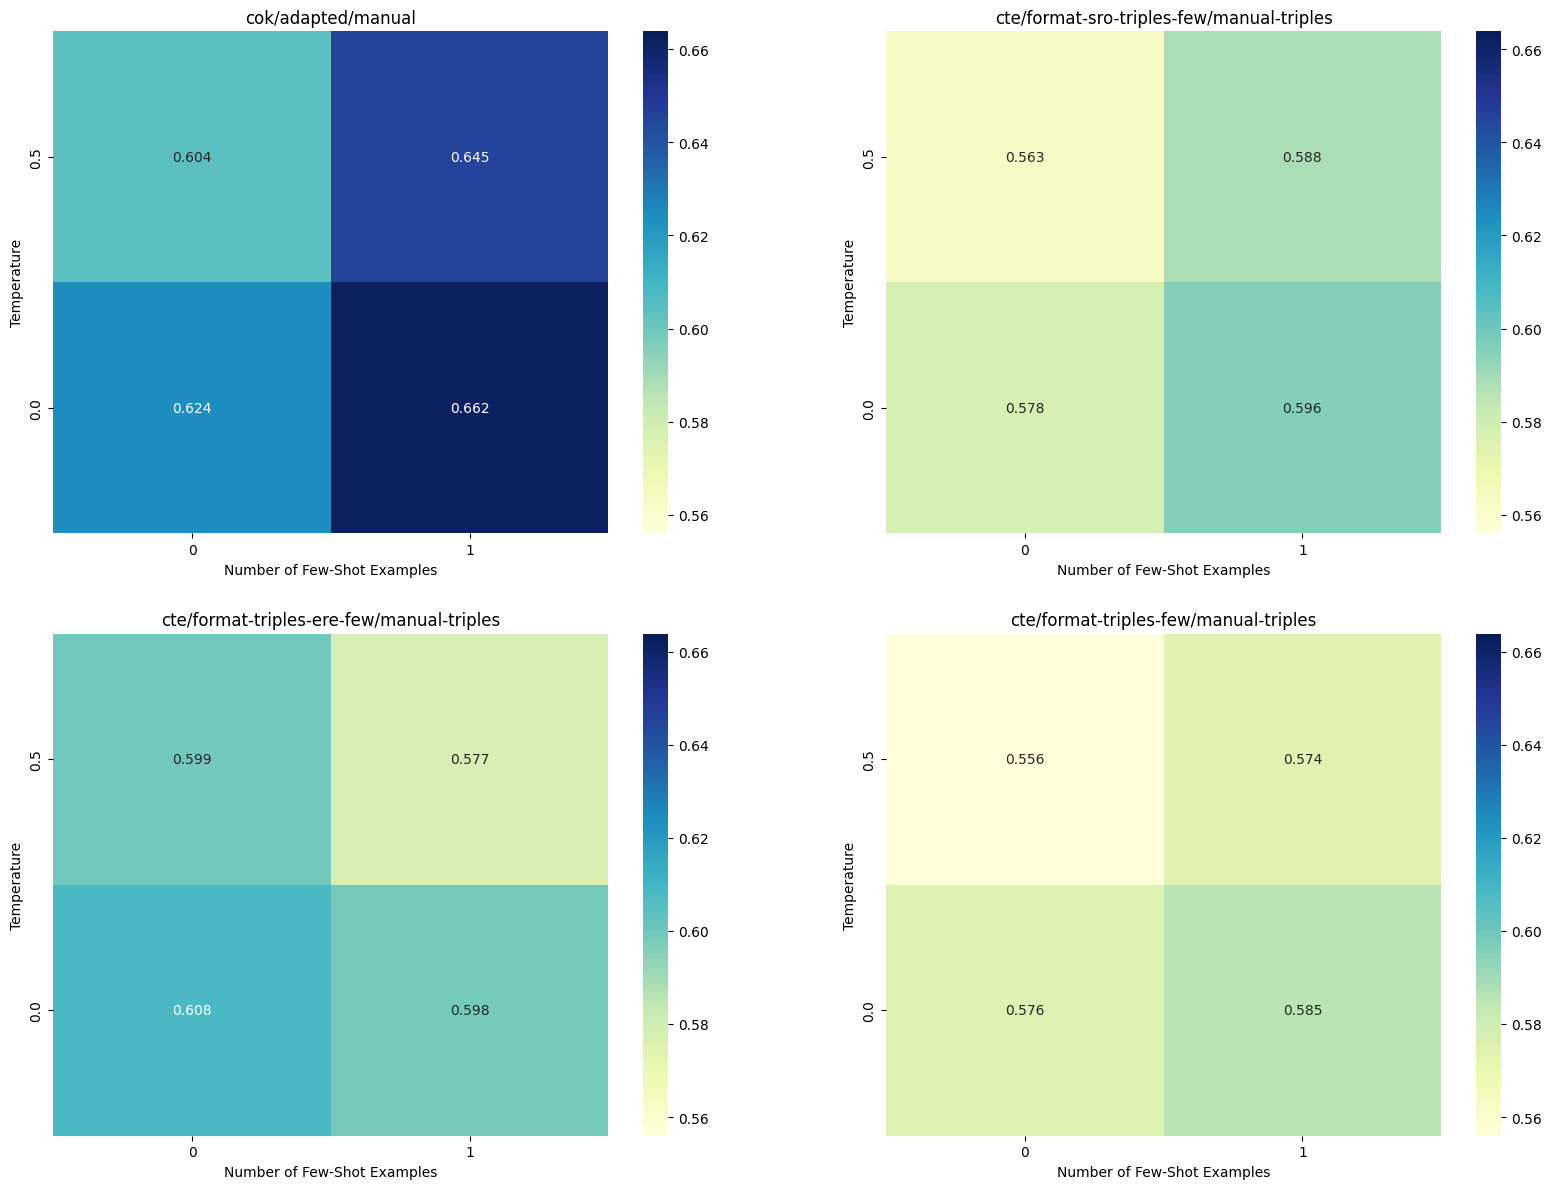

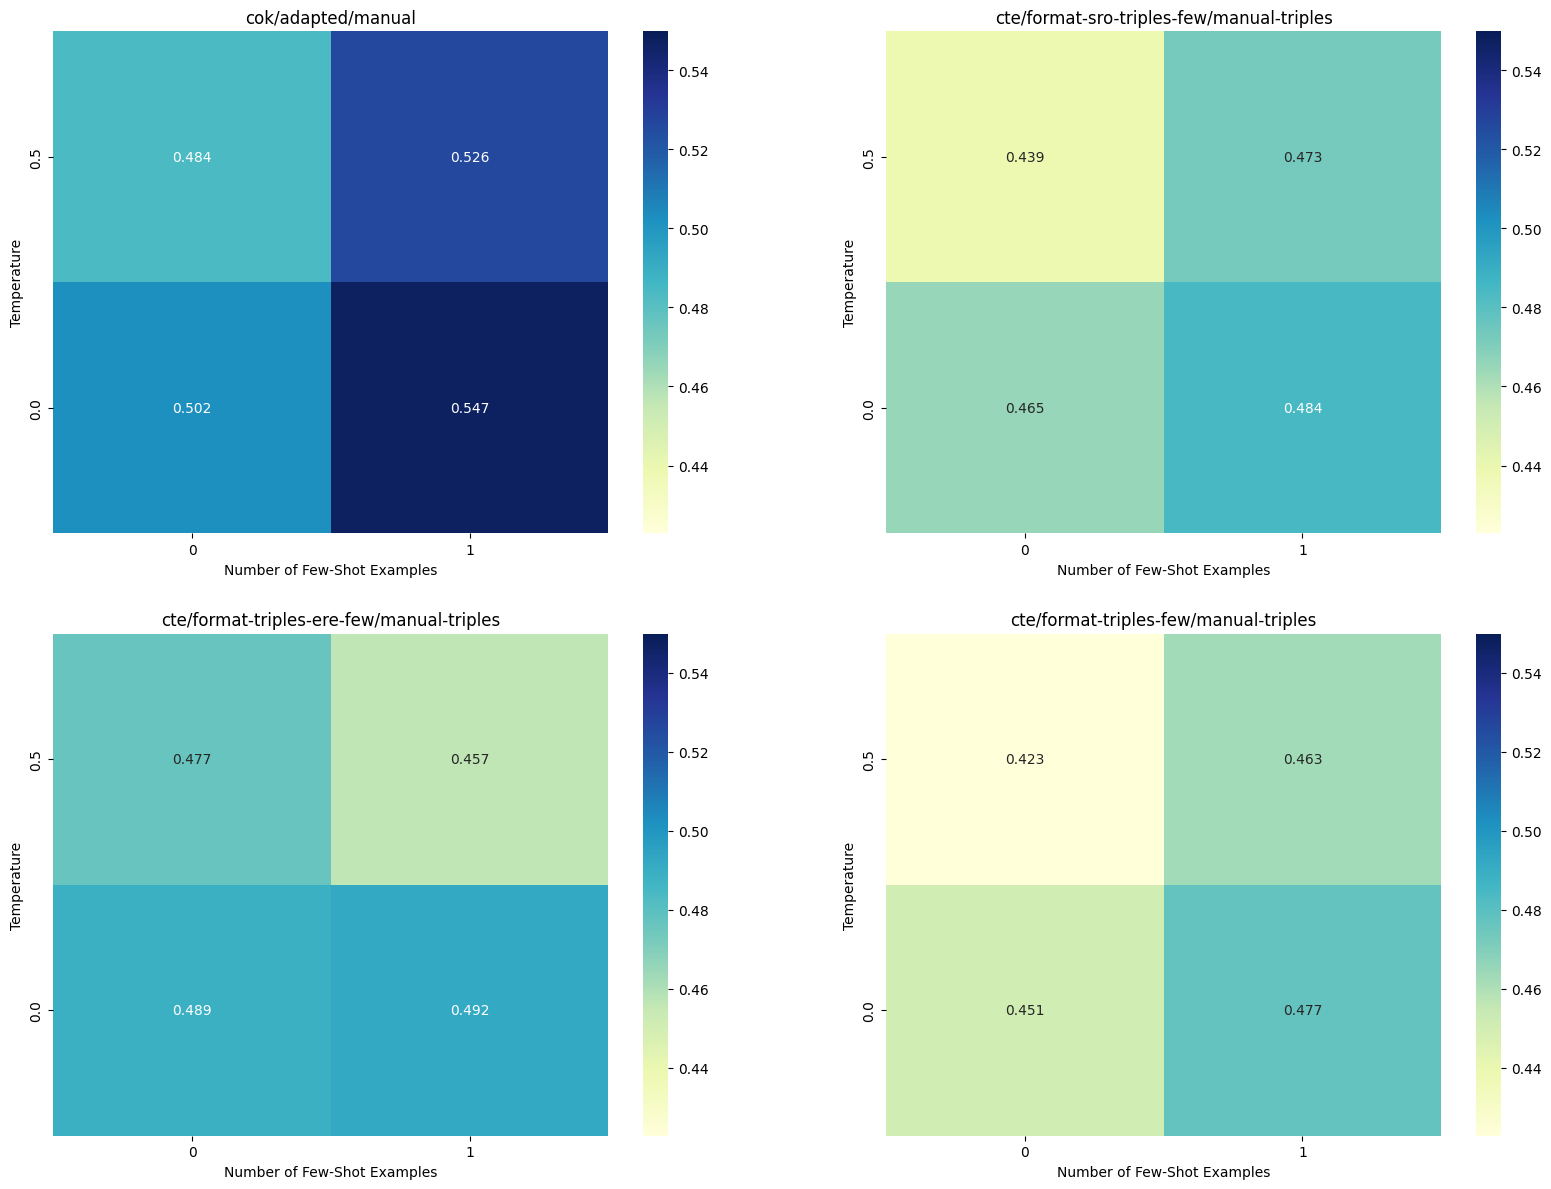

llama-3-70b-tgi


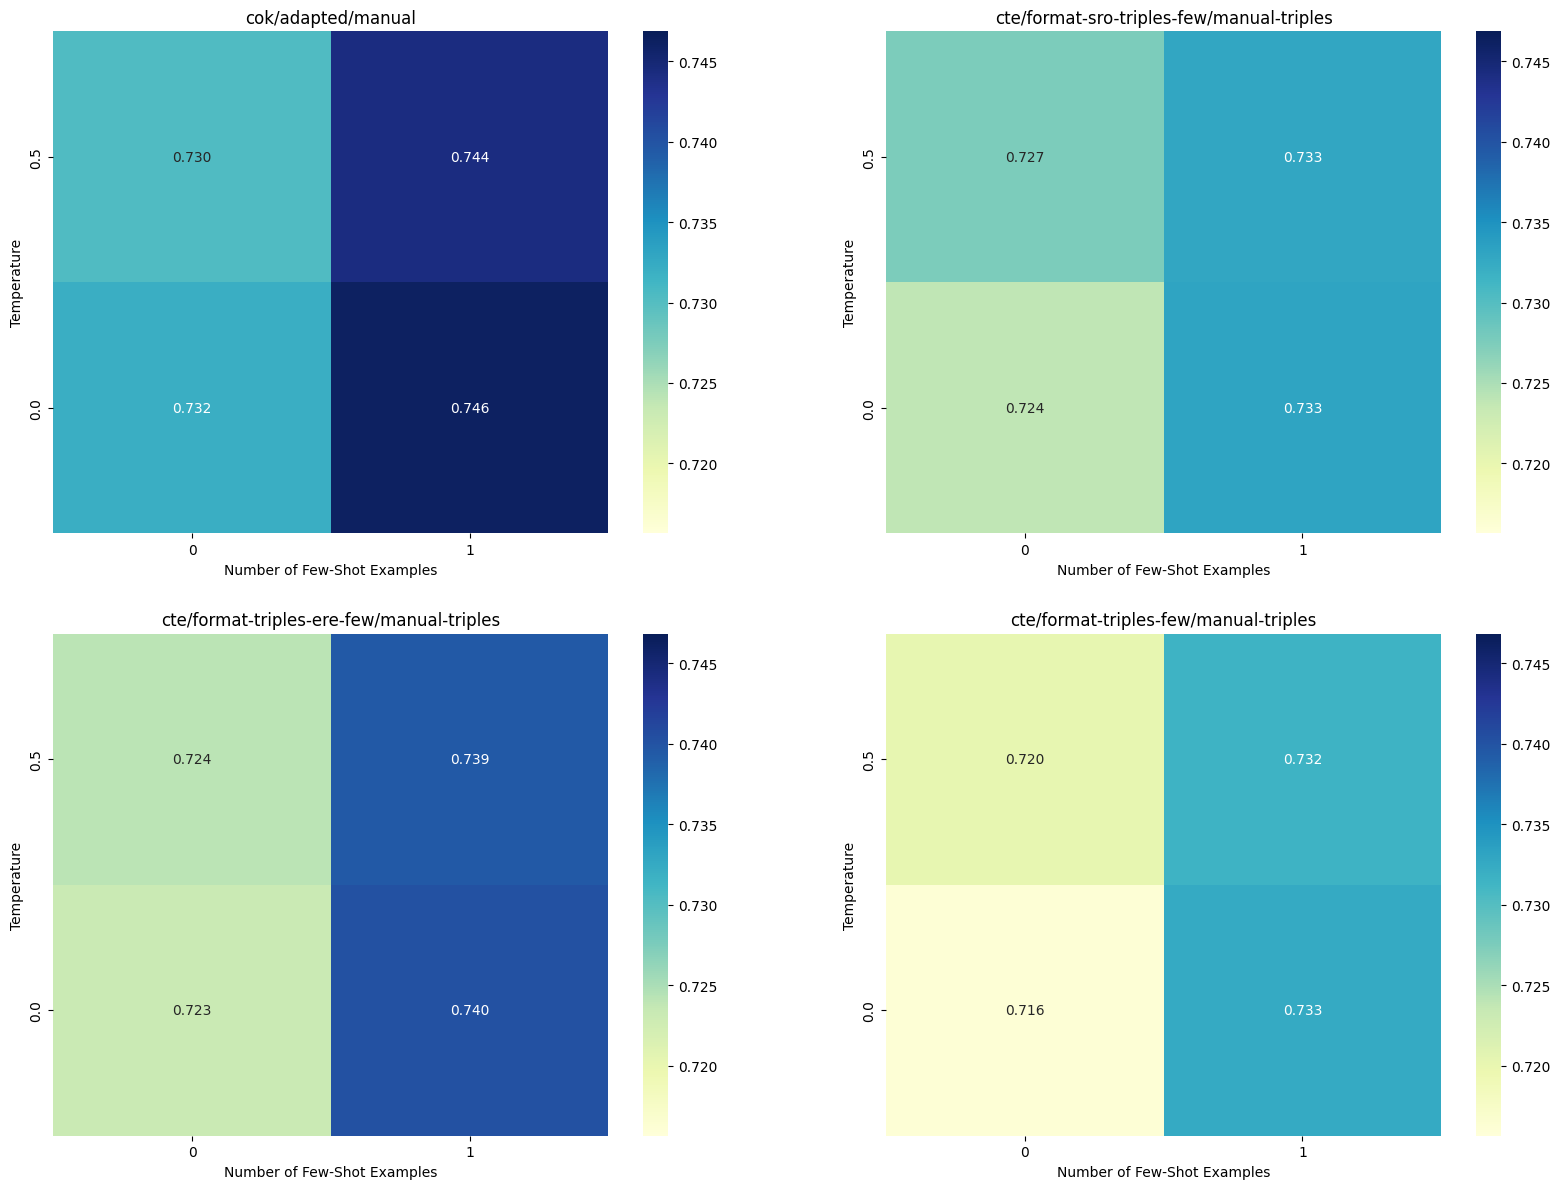

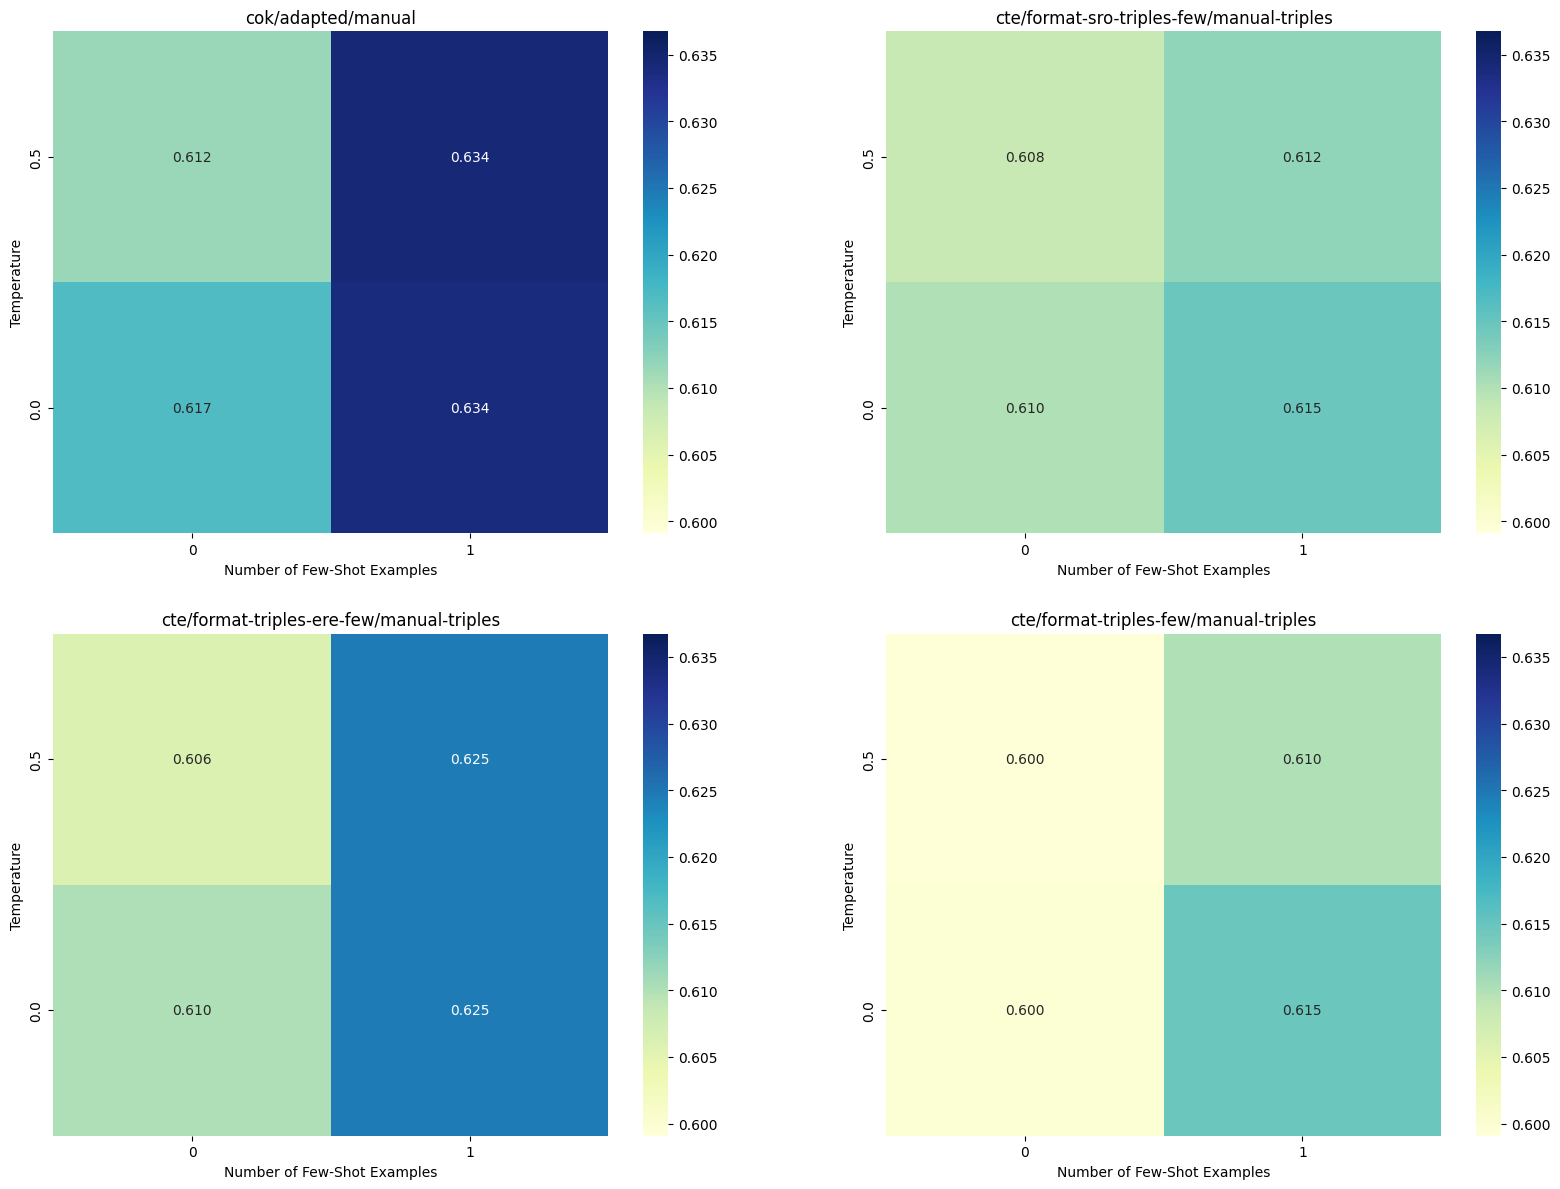

In [11]:
for model in df[ "params.qa.model"].unique():
    print(model)
    plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")
    plot_heatmap(df[df["params.qa.model"] == model], "metrics.exact_match")

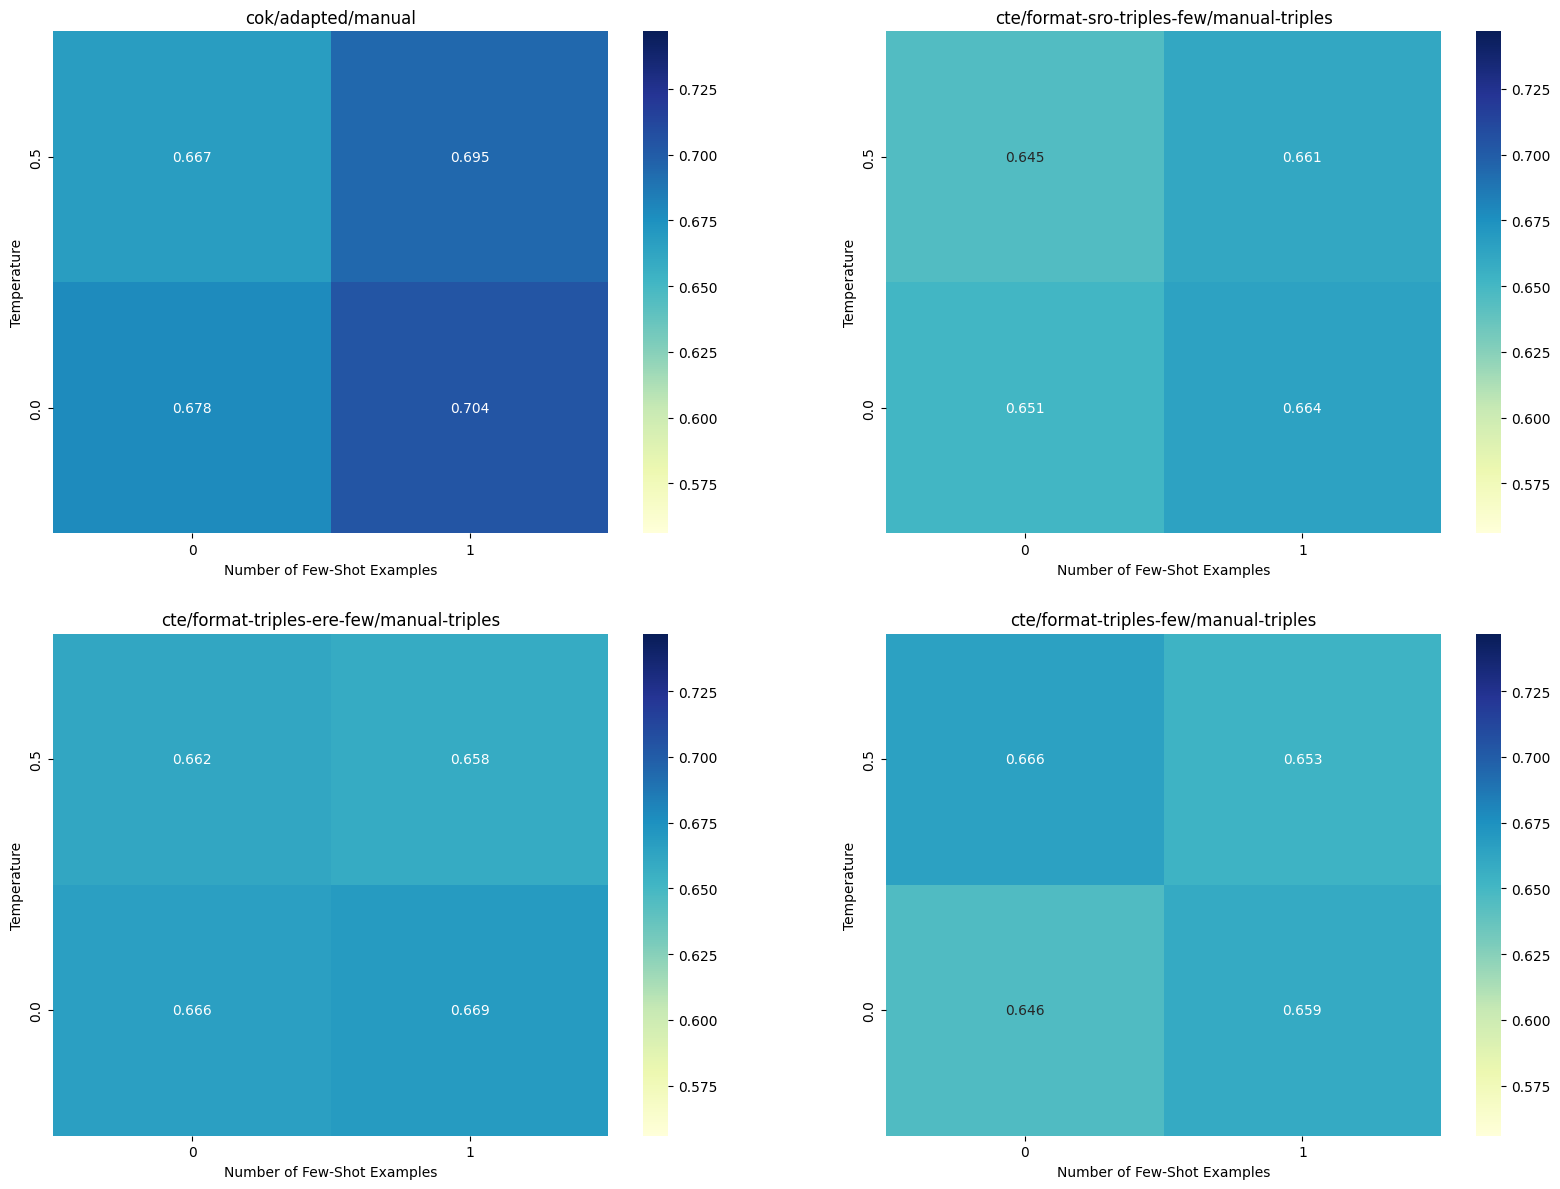

In [12]:
plot_heatmap(df, "metrics.f1")
